# Introdução

Nesse arquivo vão conter pequenos trechos de códigos com o objetivo de entender o funcionamento dos modelos de classificação.

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [2]:
#criando dados sintéticos
x = 2 * np.random.rand(100, 1) # -- cria 100 valores entre 0 e 1, e cada valor é multiplicado por 2.
y = 4 + 2 * x + np.random.rand(100, 1) # -- y é uma reta passando em x porém, np.random.rand adiciona alguns valores a mais para criar um ruído.

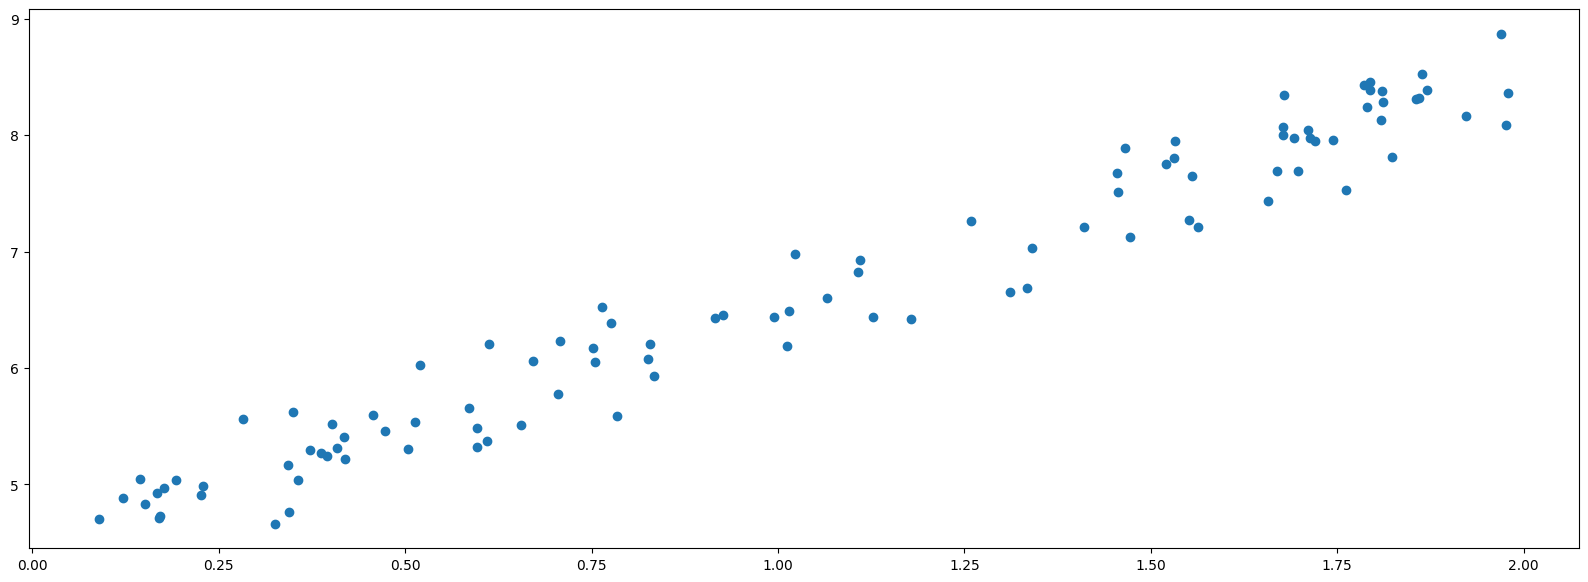

In [7]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

## Regressão Linear

O primeiro modelo a ser estudado será o de Regressão Linear, que mostra o quão correlacionadas duas variáveis estão. Ou seja, se uma é ou não dependente da outra.

In [3]:
#criando um conjunto x_b com um valor na posição 0 e os valores de x na posição 1
# isso é necessário pra haver o encaixe desse valores com o par theta (theta 0)
x_b = np.c_[np.ones((100, 1)), x]
x_b

array([[1.        , 0.98792438],
       [1.        , 0.16980506],
       [1.        , 1.61399078],
       [1.        , 0.70349088],
       [1.        , 0.49254839],
       [1.        , 0.77534519],
       [1.        , 0.33896195],
       [1.        , 1.98638742],
       [1.        , 0.46584985],
       [1.        , 0.10258062],
       [1.        , 0.41006752],
       [1.        , 1.15305057],
       [1.        , 0.59127802],
       [1.        , 0.42990256],
       [1.        , 1.28554034],
       [1.        , 1.97204127],
       [1.        , 0.35125862],
       [1.        , 1.73851713],
       [1.        , 1.90033833],
       [1.        , 1.55700465],
       [1.        , 0.3018821 ],
       [1.        , 0.61519852],
       [1.        , 0.7161497 ],
       [1.        , 0.47782244],
       [1.        , 0.51972911],
       [1.        , 1.43269618],
       [1.        , 1.30184794],
       [1.        , 1.41067998],
       [1.        , 1.90717012],
       [1.        , 1.14044095],
       [1.

Vamos utilizar alguns conhecimentos avançados em matemática para encontrar a melhor curva que passa pelos pontos.  
As duas equações abaixo vão nos ajudar com isso.
- Equação normal $ \hat y = \theta_0 + \theta_1 \times x $
- Solução Analítica $ \hat \theta = (x^T \times x)^{-1} \times x^T \times y $

Onde $\theta_0$ e $\theta_1$ são os parâmetros que queremos encontrar pois eles descrevem a curva.  
$\hat \theta = [\theta_0, \theta_1]$

In [10]:
#usando a solução analitica para encontrar os parametros theta 0 e theta 1 da equação normal
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [11]:
theta

array([[4.50870067],
       [2.01028472]])

In [12]:
#equação normal
y_hat = theta[0] + theta[1]*x

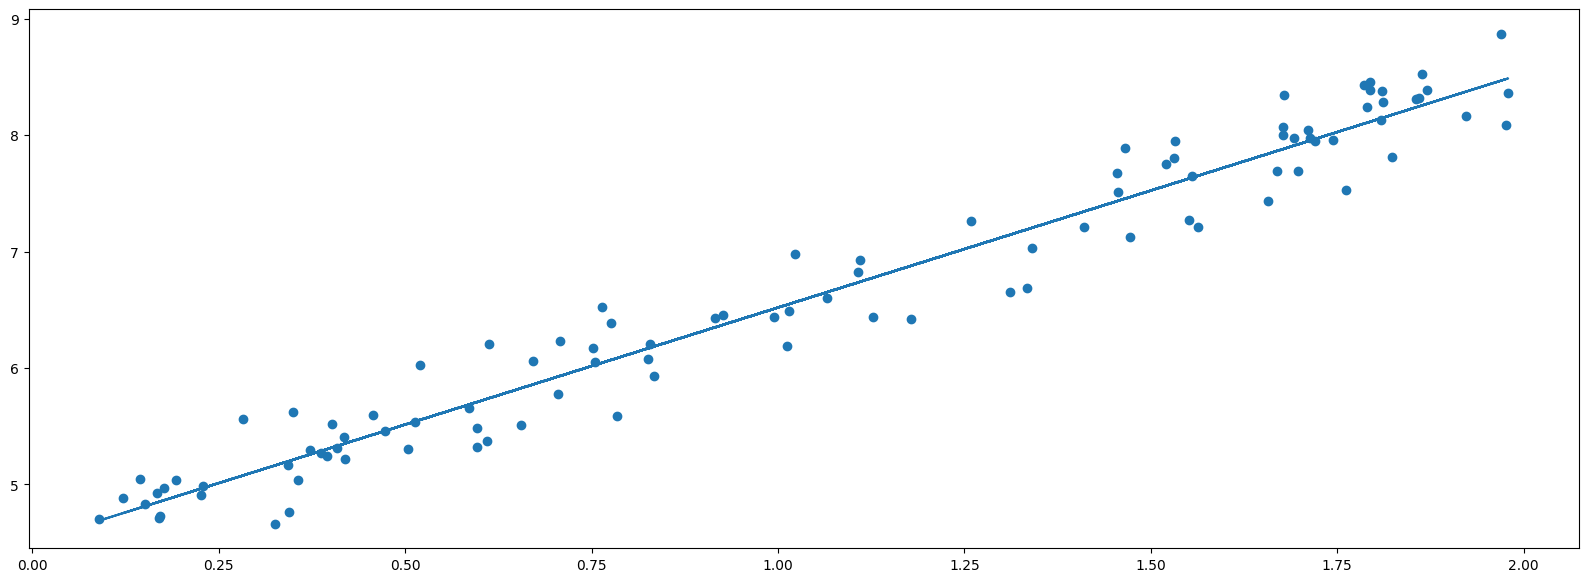

In [13]:
#plotando os valores e a curva normal
fig, ax = plt.subplots(figsize=(20, 7))
plt.plot(x, y_hat)
plt.scatter(x, y)

## Gradient Descent 

A equação analítica se torna iviável quando trabalhamos com um conjunto muito grande de dados. Portanto, vamos utilizar um algorítimo que trabalha com o gradiente da função de custo. O algorítimo atualiza $\theta$ de forma iterativa na tentativa de minimizar o custo, já que bons valores de $\theta$ ajustam bem a curva aos dados e por consequência, o custo será mínimo.  
Esse é o _Gradient Descent_ :
$$ \theta^{next} = \theta - \eta \times \nabla MSE (\theta)$$

Onde :
- $\theta^{next}$ é o próximo valor de theta
- $\theta$ é o valor atual de theta
- $\eta$ é o passo, mais conhecido como _learning rate_ (taxa de aprendizado)
- $\nabla MSE (\theta)$ é o gradiente do MSE em função de theta : $\nabla MSE (\theta) = \frac{2}{m} \times x^T \times (x \times \theta - y)$

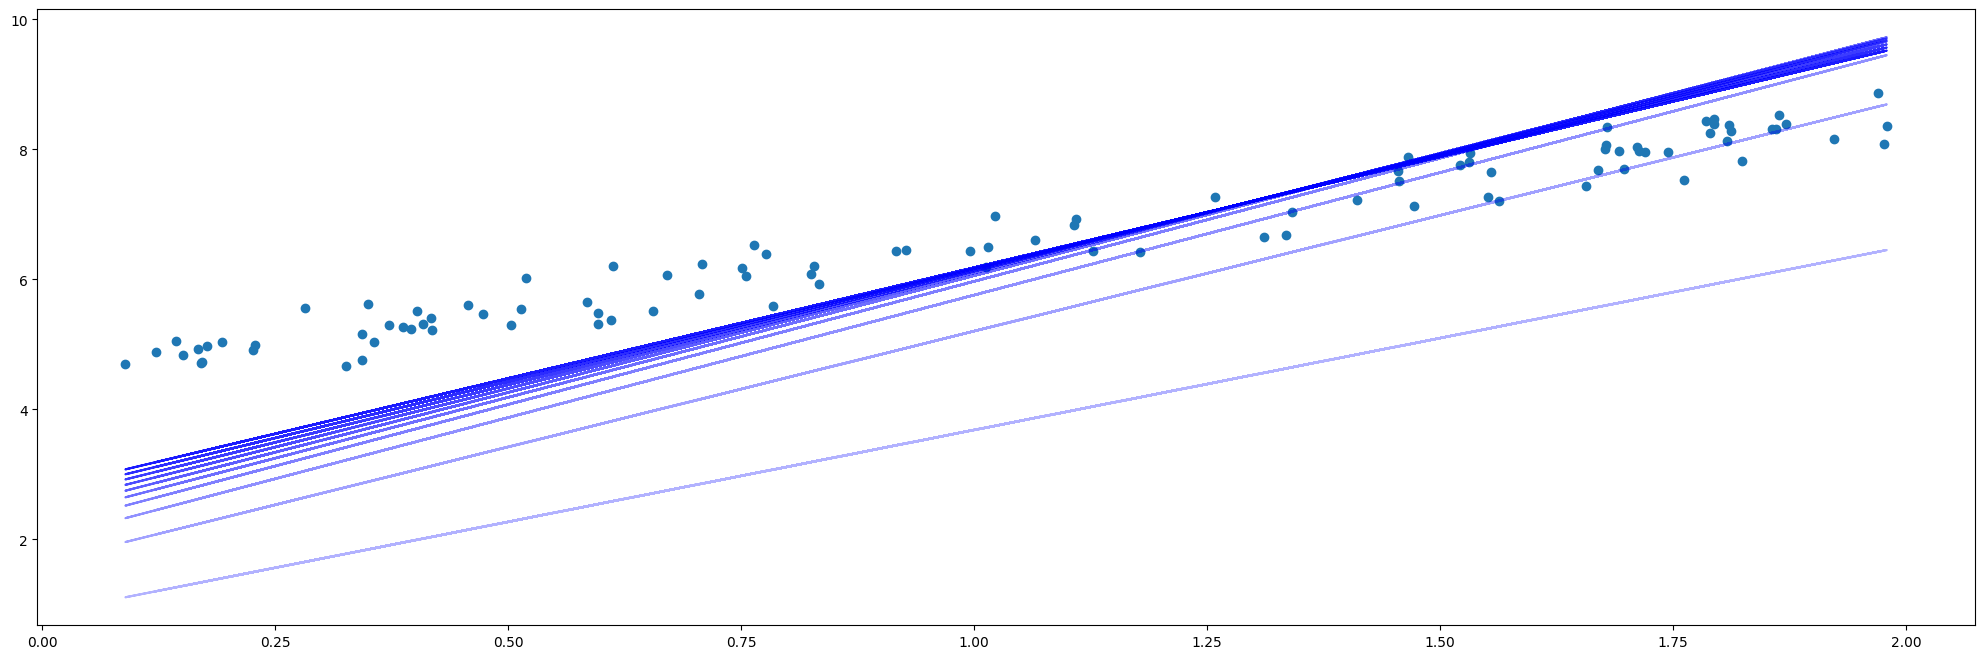

In [ ]:
eta = 0.14 # learning rate
m = 100 # quantidade de valores
n_interations = 10 # número de iterações

theta = np.random.randn(2, 1)# inicialização de theta com valores aleatórios
fig, ax = plt.subplots(figsize=(25, 8))
plt.scatter(x, y)

for interations in range(n_interations):
  gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
  theta = theta - eta * gradients
  y_hat = theta[0] + theta[1] * x

  ax.plot(x, y_hat, alpha=0.3 + interations/(n_interations+5), color='blue')

## Regressão Polinomial 

Essa técnica busca melhorar o encaixe da curva com os dados aumentando o gráu do polinómio.
$$ \hat y = \theta_0 + \theta_1 \times x + \theta_2 \times x^2 + ... + \theta_n \times x^n $$

Aqui vamos usar um polinómio de gráu 2 : $\hat y = \theta_0 + \theta_1 \times x + \theta_2 \times x^2$

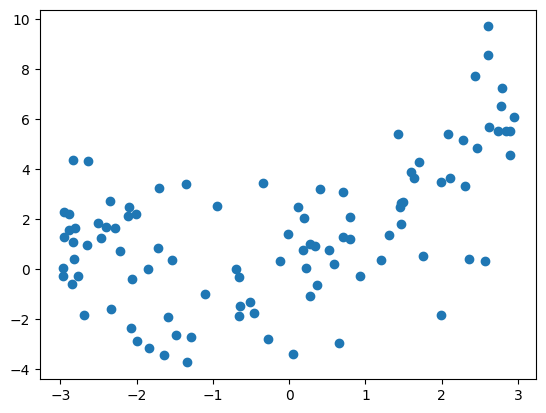

In [7]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 * np.random.randn(m, 1)

plt.scatter(x, y)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_poly = poly_features.fit_transform(x)

In [1]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

In [33]:
lin_reg.intercept_

array([0.05406724])

In [34]:
lin_reg.coef_

array([[0.90858402, 0.59968031]])

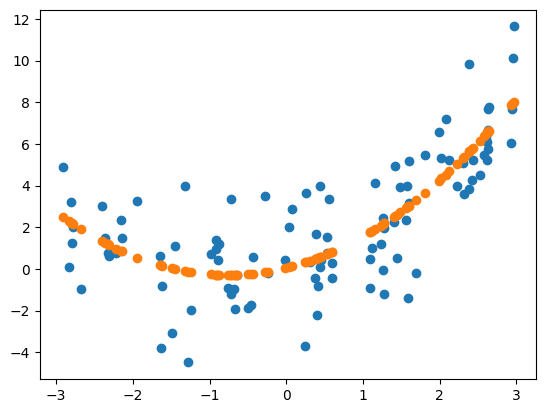

In [35]:
plt.scatter(x, y)
plt.scatter(x, lin_reg.predict(x_poly))

## Ridge Regression

Essa é uma técnica de normalização. A ideia dessa técnica é penalizar nossos modelos a medida que sua complexidade aumenta.  
Para isso, é utilizada a função de custo padrão (o MSE) acrescido de um termo que penaliza o acrescimo de $\theta$.  
A função de custo Ridge Regression é definida como:

$\tau (\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum_{i=0}^n \theta_i^2$

Onde:
- $\text{MSE}(\theta)$ é a função de custo padrão;
- $\alpha$ é o fator de penalização;  

Vamos ver isso na prática, com um exemplo.

In [9]:
m = 100
x = np.random.rand(m, 1) - 3
y = np.random.randn(m, 1)

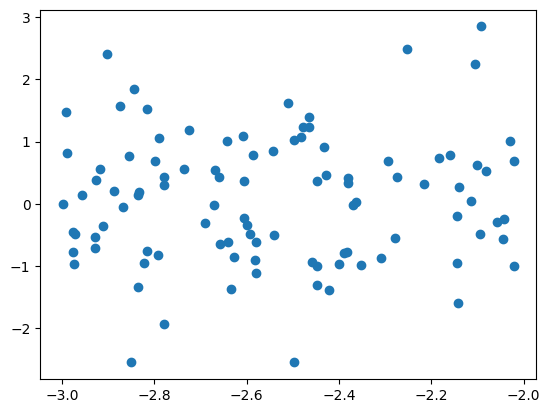

In [10]:
plt.scatter(x, y)

In [11]:
from sklearn.linear_model import Ridge

Vamos testar para três valores de $ \alpha $ diferentes.

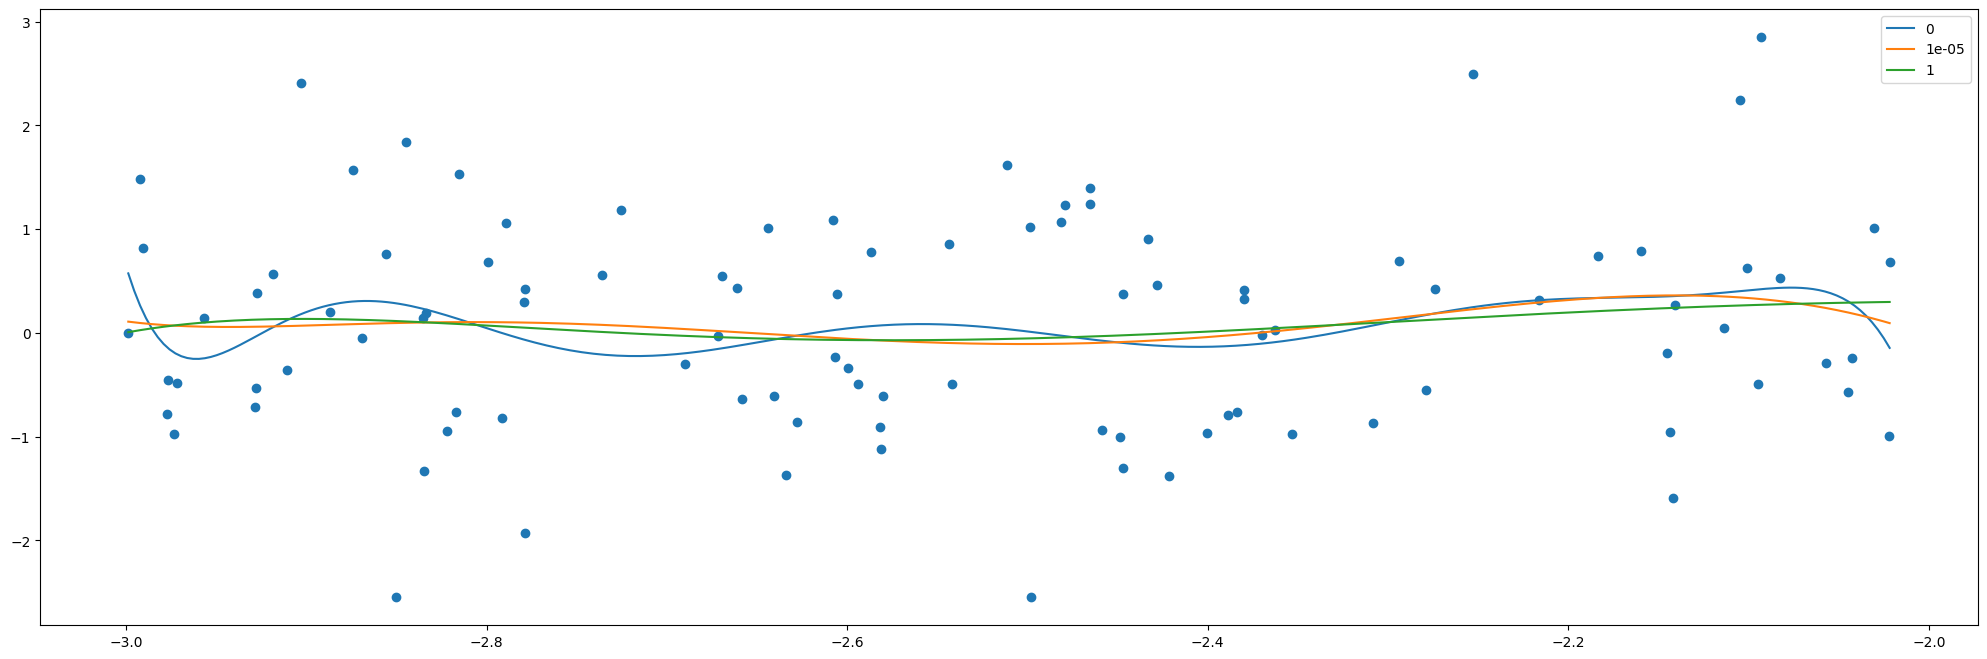

In [13]:
fig, ax = plt.subplots(figsize=(25, 8))
plt.scatter(x, y)

for alpha in [0, 1e-5, 1]:
  poly_features = PolynomialFeatures(degree=10, include_bias=False)
  x_poly = poly_features.fit_transform(x)
  x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

  ridge_reg = Ridge(alpha=alpha, solver='cholesky')
  ridge_reg.fit(x_poly, y)

  x_seq_transf = poly_features.fit_transform(x_seq)
  plt.plot(x_seq, ridge_reg.predict(x_seq_transf), label=alpha)

ax.legend()

Como pode ser visto no gráfico, a medida que $\alpha$ aumenta a oscilação das curvas diminuem e, por consequência, tornam-se mais estáveis e menos erráticas.

## Logistic Regression

A regressão logística trabalha com a previsão de classe. Não buscamos saber um valor exato, mas sim se tal informação pertence ou não uma certa classe.  
   
$$\sigma (t) = \frac{1}{1 + e^{-t}} $$

A função acima é chamada **Função logística**, é nela que se baseia o método de regressão logística.  
Se plotarmos um gráfico, veremos que os valores de $y$ tem $mín = 0$ e $máx = 1$, e que a curva corta o eixo $y$ no valor $y = 0.5$ quando $x = 0$.  
Então o que o modélo vai fazer é calcular a probabilidade de uma informação pertencer ou não a uma classe de acordo com o valor da função logística :
$$
\text{Se } \sigma >= 0.5, \text{ pertence a clase.}
$$
$$
\text{Se } \sigma < 0.5, \text{ não pertence.}
$$
Então o que teriamos seria essa forma da função logística, com o nosso $x^T \theta$ :  
$$ \sigma(x^T \theta) = \frac{1}{1 + e^{-(x^T \theta)}}$$  
E como nós já sabemos, $x^T$ é o nosso vetor com as informações do nosso dado e $\theta$ são os paramêtros do modelo.

### Função Custo

A funão de custo que é aplicada nesse método ela pode ser analisada da seguinte forma :   
$$ C (\theta) = -\log (p)\text{,  Se y = 1} $$ 
para os dados que realmete pertencem a classe que estamos interassados. Ou seja, se o modélo predisse que o dado pertence a classe ($p >= 0.5$), então o custo é zero ($C (\theta) = 0$), caso contrario o custo será muito alto (próximo ao infinito para alguns casos).  
$$ C (\theta) = -\log (1 - p)\text{,  Se y = 0} $$ 
para os dados que não pertencem a classe. Ou seja, se o modélo predisse que o dado não pertence a classe ($p < 0.5 $), então o custo é zero, caso contrário será muito alto.  
Essa é uma forma simplificada de analisar a fução custo. Ela nos dá uma boa noção de como funciona a aplicação do custo na função logística.  
A forma completa da função de custo segue abaixo :  
$$ J (\theta) = -\frac{1}{m} \sum_{i=1}^{m} y_i \log(p_i) + (1 - y_i) \log(1 - p_i) $$

Onde :  
- $m$ é o número total de exemplos;
- $y_i$ são os valores reais (como já sabemos);
- $p_i$ são as probalidades previstas pelo modelo (as previsões do modelo, por assim dizer) como já sabemos.

Agora vamos partir para a prática, usando esse método em um conjunto de dados bem famoso que é o **Flor Iris**.

In [4]:
from sklearn import datasets

In [16]:
iris = datasets.load_iris()

In [18]:
#chaves do conjunto de dados
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
#as classes associadas a cada dado
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
#o nome das classes (0:setosa, 1:versicolor e 2:virginica)
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
#cada dado é composto por 4 quatro valores distribuidos em 4 colunas
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
#label de cada coluna dos dados
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
#vamos treinar o modelo para, com base na largura da pétala, ele prever se é da classe virginica.

x = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int32)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

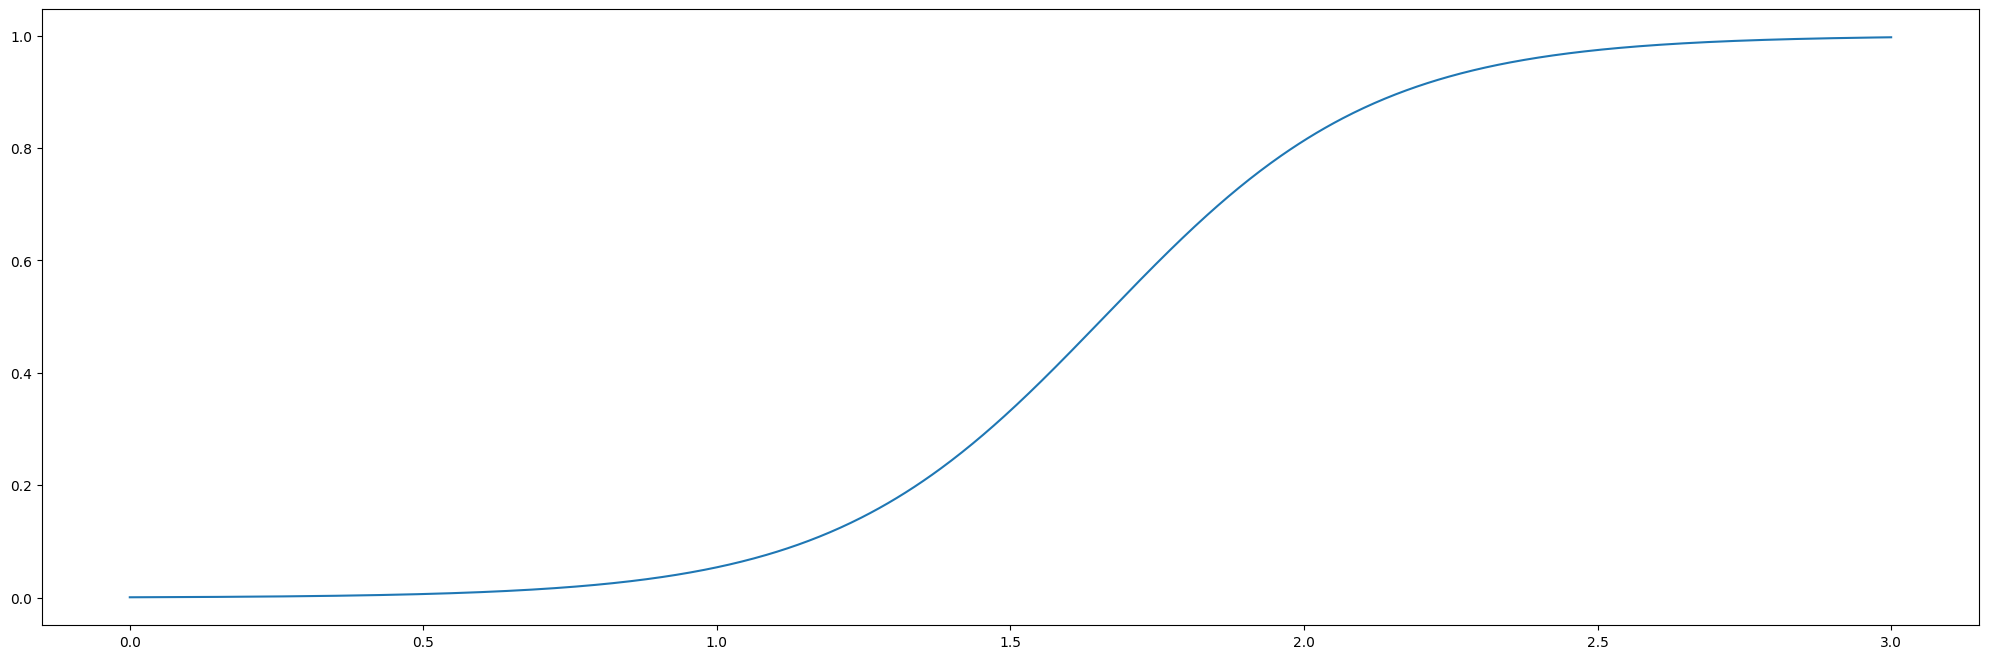

In [27]:
fig, ax = plt.subplots(figsize=(25, 8))

#criando valores fictícios de laguras de pétalas 
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)#reshape transforma o array unidimensional criado pelo linspace em uma matriz 1000X1 (-1 diz que o número de linhas vai ser igual ao número de pontos e 1 diz que terá apenas uma coluna)

#criando conjunto y_prob contendo duas colunas : NÂO-SER e SER da classe virginica.
y_prob = log_reg.predict_proba(x_new)

#plotando o gráfico
plt.plot(x_new, y_prob[:, 1:])#y_prob[;, 1:] são os valores da coluna SER, ou seja, os valores que ele acha que são da classe virginica.

Vemos que, apartir das pétalas de tamanho 1.5 cm o modélo acredita que pertencem a classe virginica.

## Softmax Regression

A regressão Softmax é uma extensão da regressão logística usada para problemas de classificação multiclasse. Enquanto a regressão logística é utilizada para classificar entre duas classes, a regressão Softmax pode lidar com três ou mais classes. O algoritmo atribui probabilidades a cada classe possível, e a classe com a maior probabilidade é escolhida como a previsão.

Funciona da seguinte forma:
1. **Entrada**: Dados de características (vetores de entrada).
2. **Saída**: Uma distribuição de probabilidade sobre as classes.
3. **Fórmula**: A função Softmax transforma os escores lineares em probabilidades, de modo que todos os valores somem 1.

A fórmula do Softmax para a classe 
$ j $ é:

$$
P(y = j | x) = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}
$$

Onde:
- $ z_j $ são os escores para cada classe $ j $,
- $ K $ é o número total de classes,
- $ e $ é a base do logaritmo natural.

Os **escores** $ z_j $ na regressão Softmax são calculados como uma combinação linear das entradas (vetor de características) e dos pesos aprendidos durante o treinamento. A fórmula para calcular o escore para a classe $ j $ é:

$$
z_j = \mathbf{w_j}^T \mathbf{x} + b_j
$$

Onde:
- $ \mathbf{w_j} $ é o vetor de pesos correspondente à classe $ j $,
- $ \mathbf{x} $ é o vetor de características (ou seja, as entradas do modelo),
- $ b_j $ é o termo de viés (bias) para a classe $ j $,
- $ z_j $ é o escore para a classe $ j $.

A equação $ \mathbf{w_j}^T \mathbf{x} $ representa o produto escalar (ou multiplicação de matriz) entre os pesos e as características de entrada.

Esse cálculo gera um conjunto de escores $ z_1, z_2, \dots, z_K $ (um para cada classe), e esses escores são então usados na função Softmax para converter os valores em probabilidades, como mostrei anteriormente.

Em resumo:
1. Primeiro, os escores $ z_j $ são calculados para cada classe usando uma combinação linear das entradas e pesos.
2. Em seguida, esses escores são normalizados pela função Softmax para produzir probabilidades associadas a cada classe.

### Cross-Entropy

Para entender a função de perda cross-entropy (entropia cruzada, para os íntimos) primeiro temos que entender os conceitos de entropia e divergência de Kullback-Leibler.  

#### Entropia

A entropia em machine learning é uma medida da incerteza ou imprevisibilidade em um conjunto de dados. Ela é frequentemente usada em algoritmos de classificação, como nas árvores de decisão.

Matematicamente, a entropia é definida como:

$$
E(S) = \sum_{i=1}^{n} p_i \log_2(1 - p_i)
$$

Onde:
- $ p_i $ é a proporção de elementos da classe $i$ no conjunto de dados $S$.
- $n$ é o número de classes.

##### Em termos simples:
- Se a entropia for **alta**, o conjunto de dados tem uma grande incerteza (classes misturadas de forma uniforme).
- Se a entropia for **baixa**, o conjunto de dados está mais ordenado (classes mais definidas ou dominantes).

No contexto de árvores de decisão, a entropia ajuda a determinar qual atributo deve ser escolhido para dividir os dados, minimizando a incerteza após a divisão.

#### Divergência de Kullback-Leibler (DKL)

A divergência de Kullback-Leibler (DKL) é uma medida que quantifica a diferença entre duas distribuições de probabilidade. Ela é frequentemente usada em estatística, aprendizado de máquina e teoria da informação. A divergência KL, denotada como $ D_{KL}(P \| Q) $, mede o quanto a distribuição $ Q $ se desvia da distribuição $ P $.

A fórmula para calcular a divergência KL é:

$$
D_{KL}(P \| Q) = \sum_{x} P(x) \log\left(\frac{P(x)}{Q(x)}\right)
$$

ou, no caso contínuo:

$$
D_{KL}(P \| Q) = \int p(x) \log\left(\frac{p(x)}{q(x)}\right) dx
$$

onde $ P $ é a distribuição verdadeira e $ Q $ é a distribuição aproximada.

##### Propriedades:
1. **Não-negatividade**: $ D_{KL}(P \| Q) \geq 0 $, sendo igual a zero se e somente se $ P $ e $ Q $ forem idênticas.
2. **Assimetria**: $ D_{KL}(P \| Q) \neq D_{KL}(Q \| P) $ em geral.
3. **Unidade**: A divergência KL é medida em nats se a base do logaritmo for $ e $ e em bits se a base for 2.

##### Aplicações:
- Otimização de modelos em aprendizado de máquina (como em variational inference).
- Comparação de distribuições em estatística.
- Medidas de informação em teoria da informação.

Com esse dois conceitos em maos, podemos chegar a formúla que descreve a função de perda **Cross-Entropy**:
$$
H(P, Q) = E(P) + D_{KL}(P || Q)
$$

Onde :
- $P$ é a distribuição do que o modélo previu;
- $Q$ é a distribuição real.

In [36]:
#pegando apenas o comprimento e largura das pétalas
x = iris['data'][:, (2, 3)]

#pegamdo as 3 classes de iris
y = iris['target']

In [37]:
#o modélo sofmax já se encontra dentro do LogisticRegression, basta passar o argumento multi_class='multinomial'.
softmax_reg = LogisticRegression(multi_class='multinomial')
softmax_reg.fit(x, y)

#essas 2 linhas de código resumem toda teoria trazida anteriormente.

c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [38]:
#qual classe o modélo acha que pertence os seguintes valores de comprimento e largura de pétala, respectivamente.
softmax_reg.predict([[5, 2]])

array([2])

In [39]:
#probabilidades de pertencer a cada classe.
softmax_reg.predict_proba([[5, 2]])

array([[2.43199208e-04, 2.14948752e-01, 7.84808048e-01]])